<a href="https://colab.research.google.com/github/jenpronet/Challenge-Alura-TelecomX_2-Latam/blob/main/TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparacion de los Datos

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('/content/datos_tratados.csv', sep=',')

In [5]:
print("Primeras 5 filas del DataFrame:")
display(df.head())

Primeras 5 filas del DataFrame:


,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
print("\nInformación del DataFrame:")
print(df.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7043 non-null   object 
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   object 
 5   dependents         7267 non-null   object 
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   object 
 8   multiple_lines     7267 non-null   object 
 9   internet_service   7267 non-null   object 
 10  online_security    7267 non-null   object 
 11  online_backup      7267 non-null   object 
 12  device_protection  7267 non-null   object 
 13  tech_support       7267 non-null   object 
 14  streaming_tv       7267 non-null   object 
 15  streaming_movies   7267 non-null   object 
 

## Eliminación de Columnas Irrelevantes

In [7]:
# Eliminar columna de ID del cliente
df_clean = df.drop(columns=['customer_id'])

# Verificar columnas restantes
print("Columnas después de eliminar ID:")
print(df_clean.columns.tolist())

Columnas después de eliminar ID:
['churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges']


In [8]:
# Identificar columnas con alto porcentaje de valores únicos
high_unique_cols = []
for col in df.columns:
    unique_ratio = df[col].nunique() / len(df)
    if unique_ratio > 0.95:  # Columnas con >95% valores únicos
        high_unique_cols.append(col)

# Eliminar estas columnas
if high_unique_cols:
    df_clean = df.drop(columns=high_unique_cols)
    print(f"Columnas con valores únicos eliminadas: {high_unique_cols}")

Columnas con valores únicos eliminadas: ['customer_id']


In [9]:
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
df_clean = df_clean.drop(columns=constant_cols)

In [10]:
high_null_cols = df.columns[df.isnull().mean() > 0.8]  # >80% nulos
df_clean = df_clean.drop(columns=high_null_cols)

In [11]:
duplicate_cols = []
for i, col1 in enumerate(df_clean.columns):
    for col2 in df_clean.columns[i+1:]:
        if df_clean[col1].equals(df_clean[col2]):
            duplicate_cols.append(col2)
df_clean = df_clean.drop(columns=duplicate_cols)

In [12]:
print("\nResumen del dataset limpio:")
print(f"- Filas: {df_clean.shape[0]}")
print(f"- Columnas: {df_clean.shape[1]}")
print(f"- Columnas restantes: {list(df_clean.columns)}")
print("\nMuestra de datos:")
display(df_clean.head(3))


Resumen del dataset limpio:
- Filas: 7267
- Columnas: 20
- Columnas restantes: ['churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges']

Muestra de datos:


,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


## Encoding

In [13]:
# Identificar columnas categóricas (excluyendo la variable objetivo 'churn')
categorical_cols = ['gender', 'partner', 'dependents', 'phone_service',
                    'multiple_lines', 'internet_service', 'online_security',
                    'online_backup', 'device_protection', 'tech_support',
                    'streaming_tv', 'streaming_movies', 'contract',
                    'paperless_billing', 'payment_method']

# Aplicar one-hot encoding
df_encoded = pd.get_dummies(df_clean,
                            columns=categorical_cols,
                            drop_first=True,
                            prefix_sep='_')

# Verificar nuevas columnas
print("\nNúmero de columnas después de encoding:", df_encoded.shape[1])
print("Ejemplo de nuevas columnas:", df_encoded.columns.tolist()[:5])


Número de columnas después de encoding: 31
Ejemplo de nuevas columnas: ['churn', 'senior_citizen', 'tenure', 'monthly_charges', 'total_charges']


## Verificación de la Proporción de Cancelación (Churn)

In [14]:
# Calcular proporción de cancelaciones
churn_distribution = df['churn'].value_counts(normalize=True) * 100
churn_counts = df['churn'].value_counts()

# Crear resumen
churn_summary = pd.DataFrame({
    'Conteo': churn_counts,
    'Proporción (%)': churn_distribution
})

print("\nDistribución de cancelaciones:")
display(churn_summary)

# Evaluar desbalance
ratio = churn_counts.max() / churn_counts.min()
print(f"\nRatio de desbalance: {ratio:.2f}:1")

# Interpretación
if ratio > 5:
    print("⚠️ Desbalance severo detectado - Se recomienda balanceo de clases")
elif ratio > 2:
    print("⚠️ Desbalance moderado - Considerar técnicas de balanceo")
else:
    print("✅ Balance aceptable")


Distribución de cancelaciones:


,Conteo,Proporción (%)
churn,,
No,5174,73.463013
Yes,1869,26.536987



Ratio de desbalance: 2.77:1
⚠️ Desbalance moderado - Considerar técnicas de balanceo


### Manejo de valores nulos en 'churn'

In [15]:
# Eliminar filas con valores nulos en 'churn'
print("\nValores nulos en 'churn' antes:", df['churn'].isnull().sum())
df_clean = df_clean.dropna(subset=['churn'])
df_encoded = df_encoded.dropna(subset=['churn'])
print("Valores nulos en 'churn' después:", df_clean['churn'].isnull().sum())


Valores nulos en 'churn' antes: 224
Valores nulos en 'churn' después: 0


### Convertir 'total_charges' a numérico

In [16]:
# Convertir a numérico (manejando errores)
df_clean['total_charges'] = pd.to_numeric(df_clean['total_charges'], errors='coerce')
df_encoded['total_charges'] = pd.to_numeric(df_encoded['total_charges'], errors='coerce')

# Rellenar valores nulos con la mediana
median_charges = df_clean['total_charges'].median()
df_clean['total_charges'] = df_clean['total_charges'].fillna(median_charges)
df_encoded['total_charges'] = df_encoded['total_charges'].fillna(median_charges)

### verificar el dataset

In [17]:
print("\nInformación del DataFrame transformado:")
print(df_encoded.info())

print("\nPrimeras 3 filas:")
display(df_encoded.head(3))


Información del DataFrame transformado:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   churn                                   7043 non-null   object 
 1   senior_citizen                          7043 non-null   int64  
 2   tenure                                  7043 non-null   int64  
 3   monthly_charges                         7043 non-null   float64
 4   total_charges                           7043 non-null   float64
 5   gender_Male                             7043 non-null   bool   
 6   partner_Yes                             7043 non-null   bool   
 7   dependents_Yes                          7043 non-null   bool   
 8   phone_service_Yes                       7043 non-null   bool   
 9   multiple_lines_No phone service         7043 non-null   bool   
 10  multiple_lines_Yes      

,churn,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,No,0,9,65.6,593.30,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,No,0,9,59.9,542.40,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,Yes,0,4,73.9,280.85,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


## Balanceo de Clases

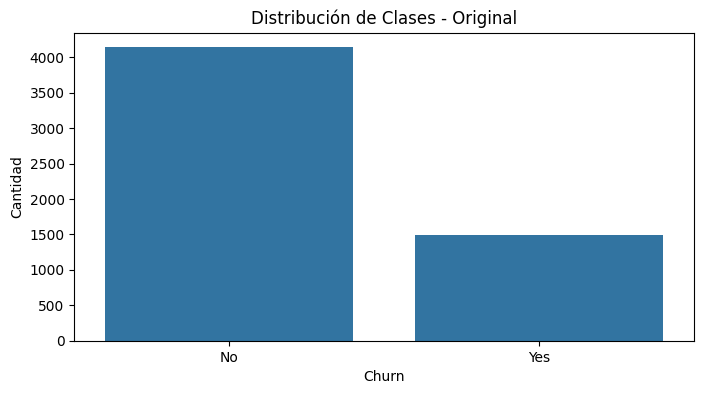

Proporción: No = 73.46%, Yes = 26.54%

=== Undersampling ===


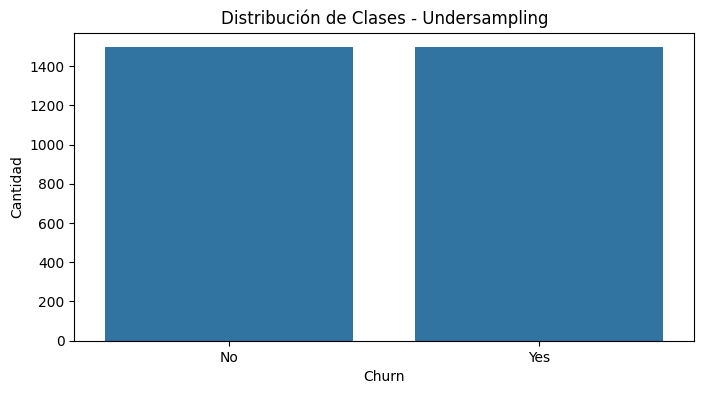

Proporción: No = 50.00%, Yes = 50.00%

=== SMOTE (Synthetic Minority Oversampling) ===


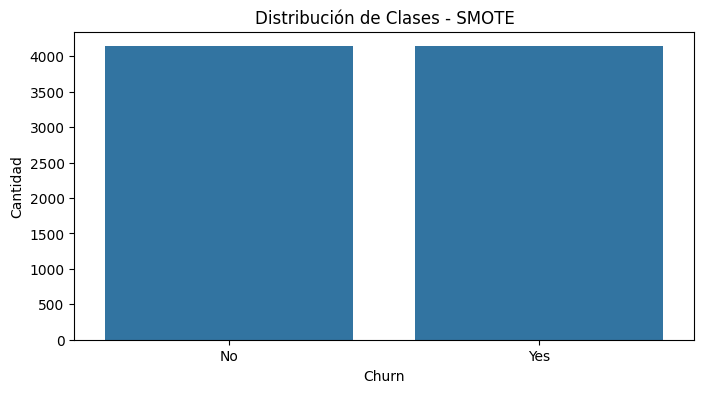

Proporción: No = 50.00%, Yes = 50.00%

=== SMOTEENN (SMOTE + Edited Nearest Neighbors) ===


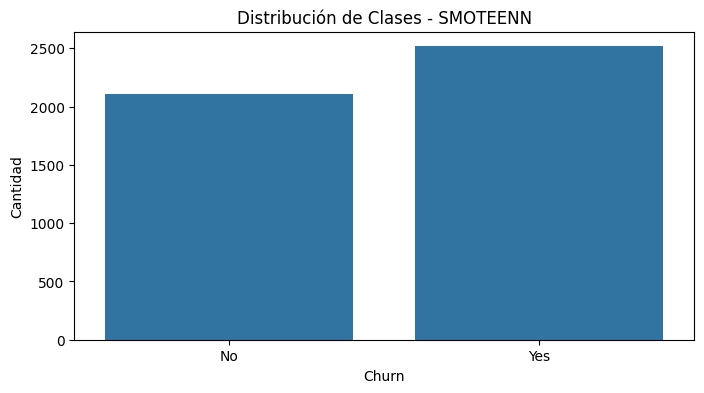

Proporción: No = 45.59%, Yes = 54.41%

=== ADASYN (Adaptive Synthetic Sampling) ===


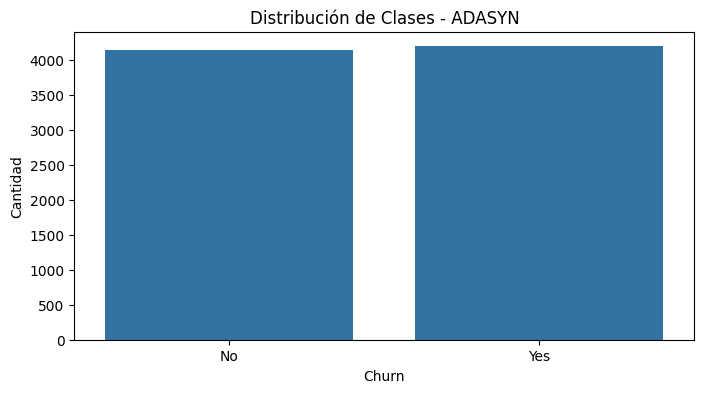

Proporción: No = 49.69%, Yes = 50.31%

=== Combinación SMOTE + Undersampling ===


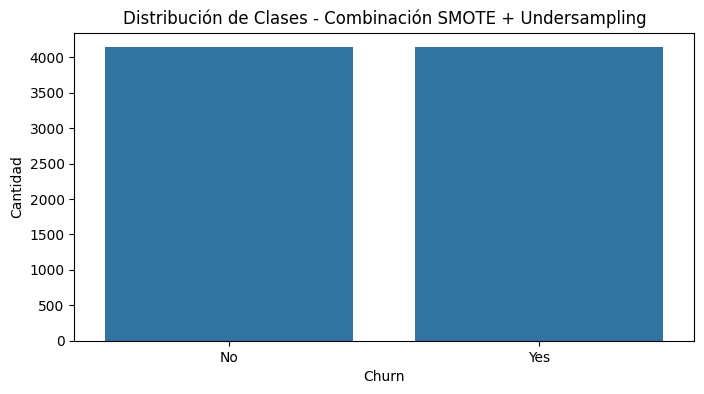

Proporción: No = 50.00%, Yes = 50.00%


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir variable objetivo a binaria
df_encoded['churn'] = df_encoded['churn'].map({'No': 0, 'Yes': 1})

# Separar características y variable objetivo
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Función para visualizar distribución de clases
def plot_class_distribution(y, title):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=y)
    plt.title(f'Distribución de Clases - {title}')
    plt.xlabel('Churn')
    plt.ylabel('Cantidad')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()
    print(f"Proporción: No = {sum(y==0)/len(y):.2%}, Yes = {sum(y==1)/len(y):.2%}")

# Distribución original
plot_class_distribution(y_train, "Original")

## 1. Undersampling (Muestreo Aleatorio)
print("\n=== Undersampling ===")
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
plot_class_distribution(y_rus, "Undersampling")

## 2. Oversampling con SMOTE
print("\n=== SMOTE (Synthetic Minority Oversampling) ===")
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
plot_class_distribution(y_smote, "SMOTE")

## 3. SMOTE + Tomek Links (SMOTEENN)
print("\n=== SMOTEENN (SMOTE + Edited Nearest Neighbors) ===")
smote_enn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smote_enn.fit_resample(X_train, y_train)
plot_class_distribution(y_smoteenn, "SMOTEENN")

## 4. ADASYN (Adaptive Synthetic Sampling)
print("\n=== ADASYN (Adaptive Synthetic Sampling) ===")
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
plot_class_distribution(y_adasyn, "ADASYN")

## 5. Combinación de técnicas (SMOTE + Undersampling)
print("\n=== Combinación SMOTE + Undersampling ===")
# Primero aplicamos SMOTE para aumentar la clase minoritaria
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Luego aplicamos undersampling a la clase mayoritaria
rus = RandomUnderSampler(random_state=42)
X_comb, y_comb = rus.fit_resample(X_smote, y_smote)
plot_class_distribution(y_comb, "Combinación SMOTE + Undersampling")

## Normalización o Estandarización


Estadísticas antes de escalar:
            tenure  monthly_charges
count  7267.000000      7267.000000
mean     32.346498        64.720098
std      24.571773        30.129572
min       0.000000        18.250000
25%       9.000000        35.425000
50%      29.000000        70.300000
75%      55.000000        89.875000
max      72.000000       118.750000

Estadísticas después de escalar (entrenamiento):
             tenure  monthly_charges  total_charges
count  5.634000e+03     5.634000e+03   5.634000e+03
mean  -1.891754e-17     1.841307e-16   6.305846e-17
std    1.000089e+00     1.000089e+00   1.000089e+00
min   -1.316072e+00    -1.553362e+00  -9.999532e-01
25%   -9.499278e-01    -8.900648e-01  -8.323758e-01
50%   -1.362734e-01     1.829525e-01  -3.940001e-01
75%    9.214774e-01     8.283451e-01   6.764142e-01
max    1.613084e+00     1.789356e+00   2.808914e+00


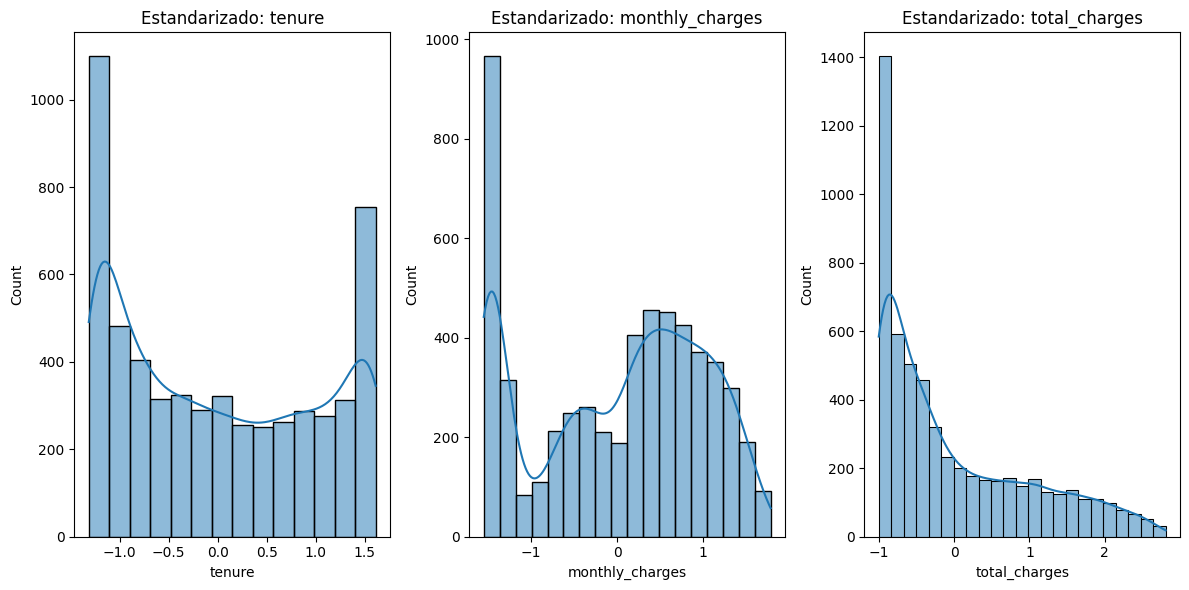

In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Identificar columnas numéricas que necesitan escalado
numeric_cols = ['tenure', 'monthly_charges', 'total_charges']

# 2. Verificar distribución antes de escalar
print("\nEstadísticas antes de escalar:")
print(df[numeric_cols].describe())

# 3. Inicializar y ajustar el escalador SOLO con datos de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])  # Solo ajustar con training data

# 4. Aplicar transformación a entrenamiento y prueba
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 5. Verificar resultados
print("\nEstadísticas después de escalar (entrenamiento):")
print(pd.DataFrame(X_train_scaled[numeric_cols], columns=numeric_cols).describe())

# 6. Visualizar distribución
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(X_train_scaled[col], kde=True)
    plt.title(f'Estandarizado: {col}')
plt.tight_layout()
plt.show()

# Correlación y Selección de Variables

## Análisis de Correlación

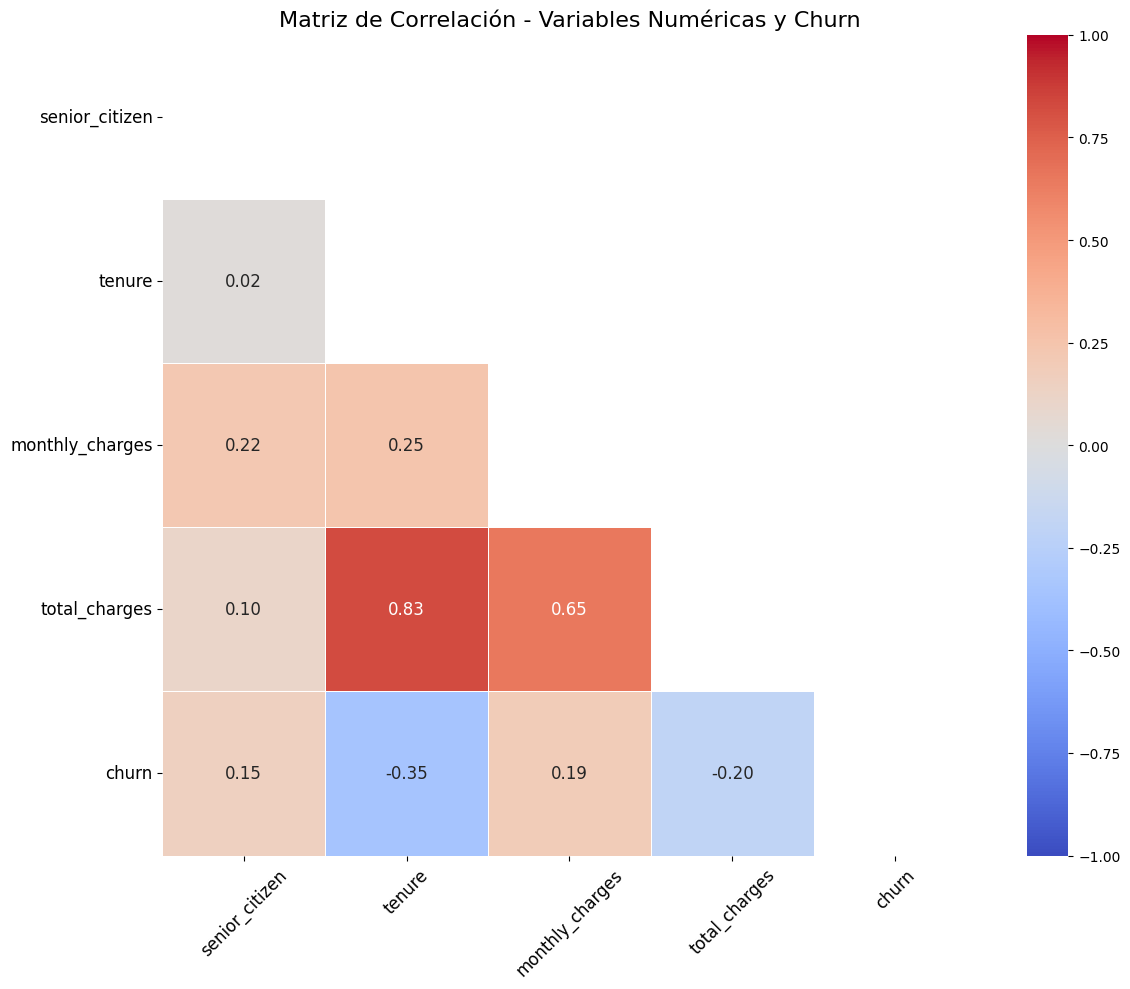


Correlación con Churn (ordenada por importancia):


,churn
monthly_charges,0.193356
senior_citizen,0.150889
total_charges,-0.199037
tenure,-0.352229


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Calcular matriz de correlación solo con variables numéricas
numeric_cols = ['senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'churn']
correlation_matrix = df_encoded[numeric_cols].corr()

# 2. Visualizar matriz de correlación con enfoque en churn
plt.figure(figsize=(12, 10))

# Crear máscara para mostrar solo mitad inferior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Heatmap mejorado
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5,
            vmin=-1, vmax=1,
            annot_kws={"size": 12})

plt.title('Matriz de Correlación - Variables Numéricas y Churn', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

# 3. Correlaciones específicas con churn (ordenadas)
churn_corr = correlation_matrix['churn'].drop('churn').sort_values(ascending=False)

print("\nCorrelación con Churn (ordenada por importancia):")
display(churn_corr)

## Análisis de Correlación con Variables Categóricas (One-Hot Encoded)

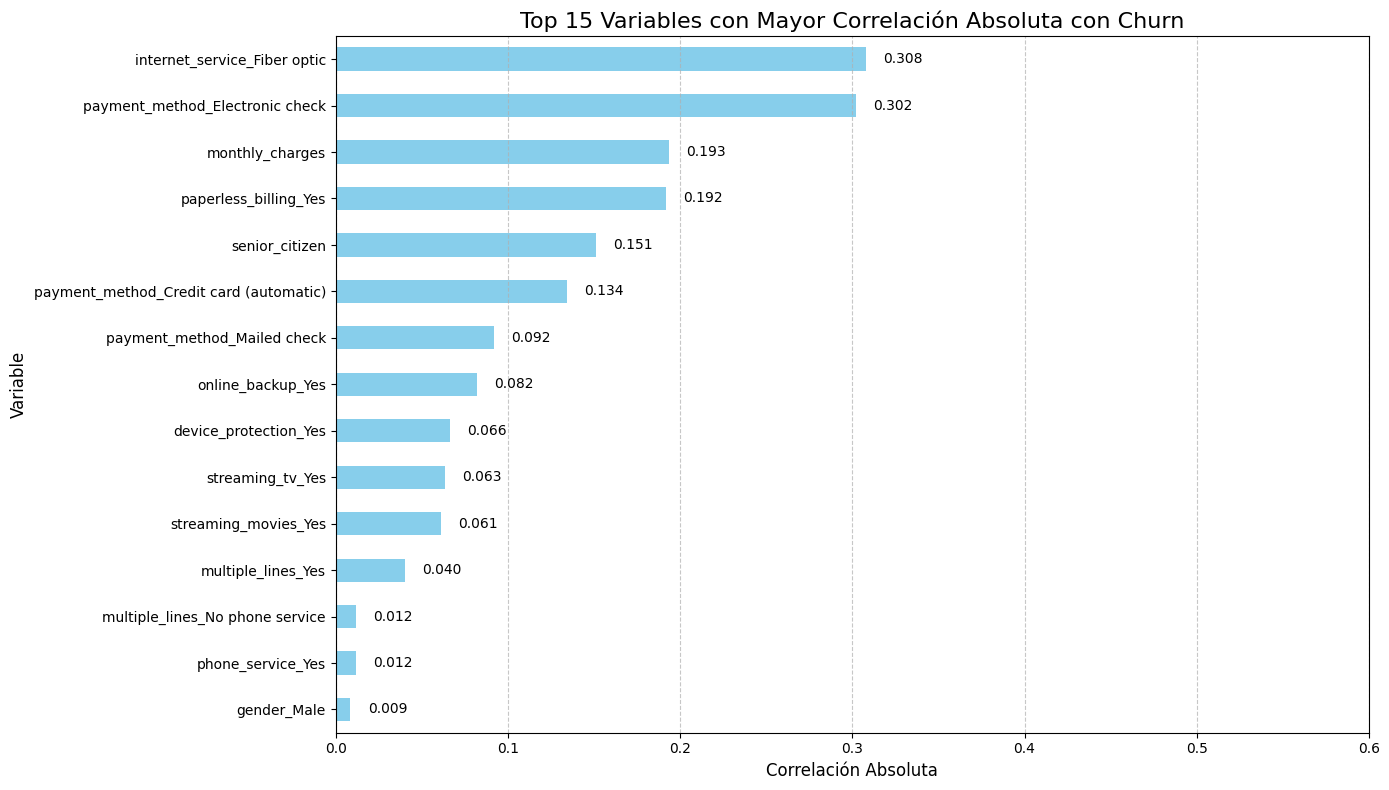


Top 15 correlaciones con Churn:


,Variable,Correlación,Correlación Absoluta
0,internet_service_Fiber optic,0.308020,0.308020
1,payment_method_Electronic check,0.301919,0.301919
2,monthly_charges,0.193356,0.193356
3,paperless_billing_Yes,0.191825,0.191825
4,senior_citizen,0.150889,0.150889
14,payment_method_Credit card (automatic),-0.134302,0.134302
13,payment_method_Mailed check,-0.091683,0.091683
12,online_backup_Yes,-0.082255,0.082255
11,device_protection_Yes,-0.066160,0.066160
5,streaming_tv_Yes,0.063228,0.063228


In [21]:
# 1. Calcular correlación de todas las variables con churn
full_corr = df_encoded.corr()['churn'].sort_values(ascending=False)

# 2. Filtrar las 15 variables con mayor correlación (absoluta)
top_features = full_corr.iloc[1:16]  # Excluye churn

# 3. Visualización de las principales correlaciones
plt.figure(figsize=(14, 8))
top_features.abs().sort_values().plot.barh(color='skyblue')
plt.title('Top 15 Variables con Mayor Correlación Absoluta con Churn', fontsize=16)
plt.xlabel('Correlación Absoluta', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.xlim(0, 0.6)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir valores exactos
for i, v in enumerate(top_features.abs().sort_values()):
    plt.text(v + 0.01, i, f"{v:.3f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 4. Resultados detallados
print("\nTop 15 correlaciones con Churn:")
display(pd.DataFrame({
    'Variable': top_features.index,
    'Correlación': top_features.values,
    'Correlación Absoluta': np.abs(top_features.values)
}).sort_values('Correlación Absoluta', ascending=False))

## Análisis Dirigido

### Tiempo de contrato (tenure) vs Cancelación

In [22]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 10.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=e65a4d8cb754125bd1cdefaa54d64d4556e33cf9609d1b706405fd4e639d82fb
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


/tmp/ipython-input-23-3152860045.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='tenure', palette='Set2')


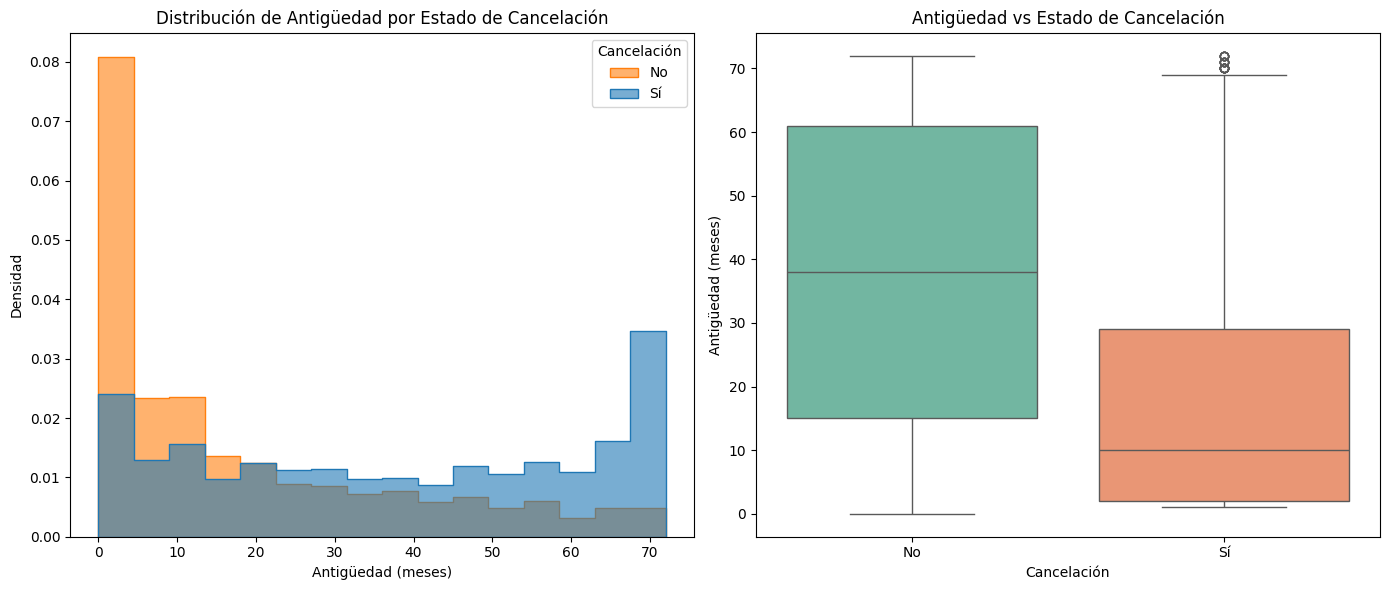

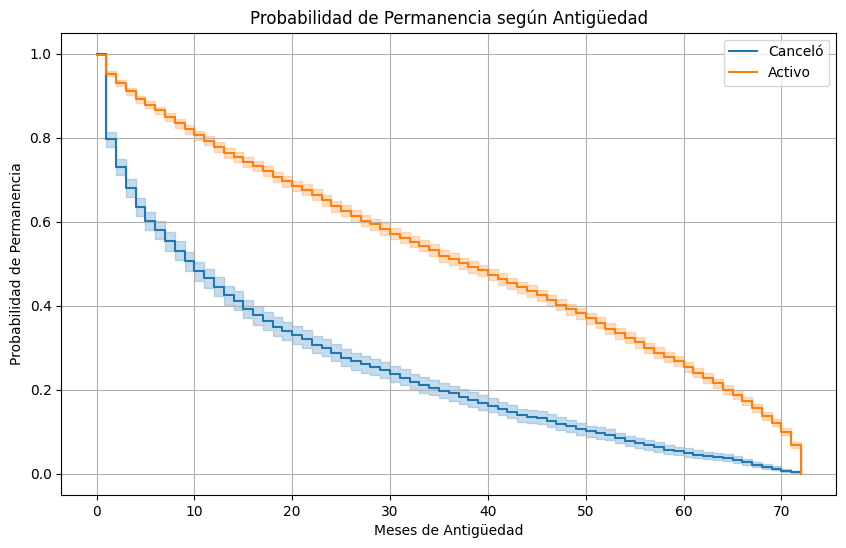

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Histograma con densidad
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='tenure', hue='churn', element='step', stat='density', common_norm=False, alpha=0.6)
plt.title('Distribución de Antigüedad por Estado de Cancelación')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Densidad')
plt.legend(title='Cancelación', labels=['No', 'Sí'])

# Boxplot comparativo
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='churn', y='tenure', palette='Set2')
plt.title('Antigüedad vs Estado de Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Antigüedad (meses)')
plt.xticks([0, 1], ['No', 'Sí'])

plt.tight_layout()
plt.show()

# Gráfico de supervivencia (Kaplan-Meier)
from lifelines import KaplanMeierFitter

plt.figure(figsize=(10, 6))

# Filtrar clientes que cancelaron
kmf_churn = KaplanMeierFitter()
kmf_churn.fit(durations=df[df['churn']=='Yes']['tenure'], event_observed=None, label='Canceló')
ax = kmf_churn.plot_survival_function()

# Filtrar clientes activos
kmf_no_churn = KaplanMeierFitter()
kmf_no_churn.fit(durations=df[df['churn']=='No']['tenure'], event_observed=None, label='Activo')
kmf_no_churn.plot_survival_function(ax=ax)

plt.title('Probabilidad de Permanencia según Antigüedad')
plt.xlabel('Meses de Antigüedad')
plt.ylabel('Probabilidad de Permanencia')
plt.grid(True)
plt.show()

### Gasto total (total_charges) vs Cancelación

In [24]:
# Elimina espacios y convierte a NaN donde no se pueda convertir a número
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')


In [25]:
df['total_charges'].dtype  # Debería decir float64


dtype('float64')

In [26]:
df['total_charges'].isna().sum()


np.int64(11)

In [27]:
df = df.dropna(subset=['total_charges'])


/tmp/ipython-input-28-507390749.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='total_charges', palette='Set2')
/tmp/ipython-input-28-507390749.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='churn', y='total_charges', inner='quartile', palette='Set2', cut=0)


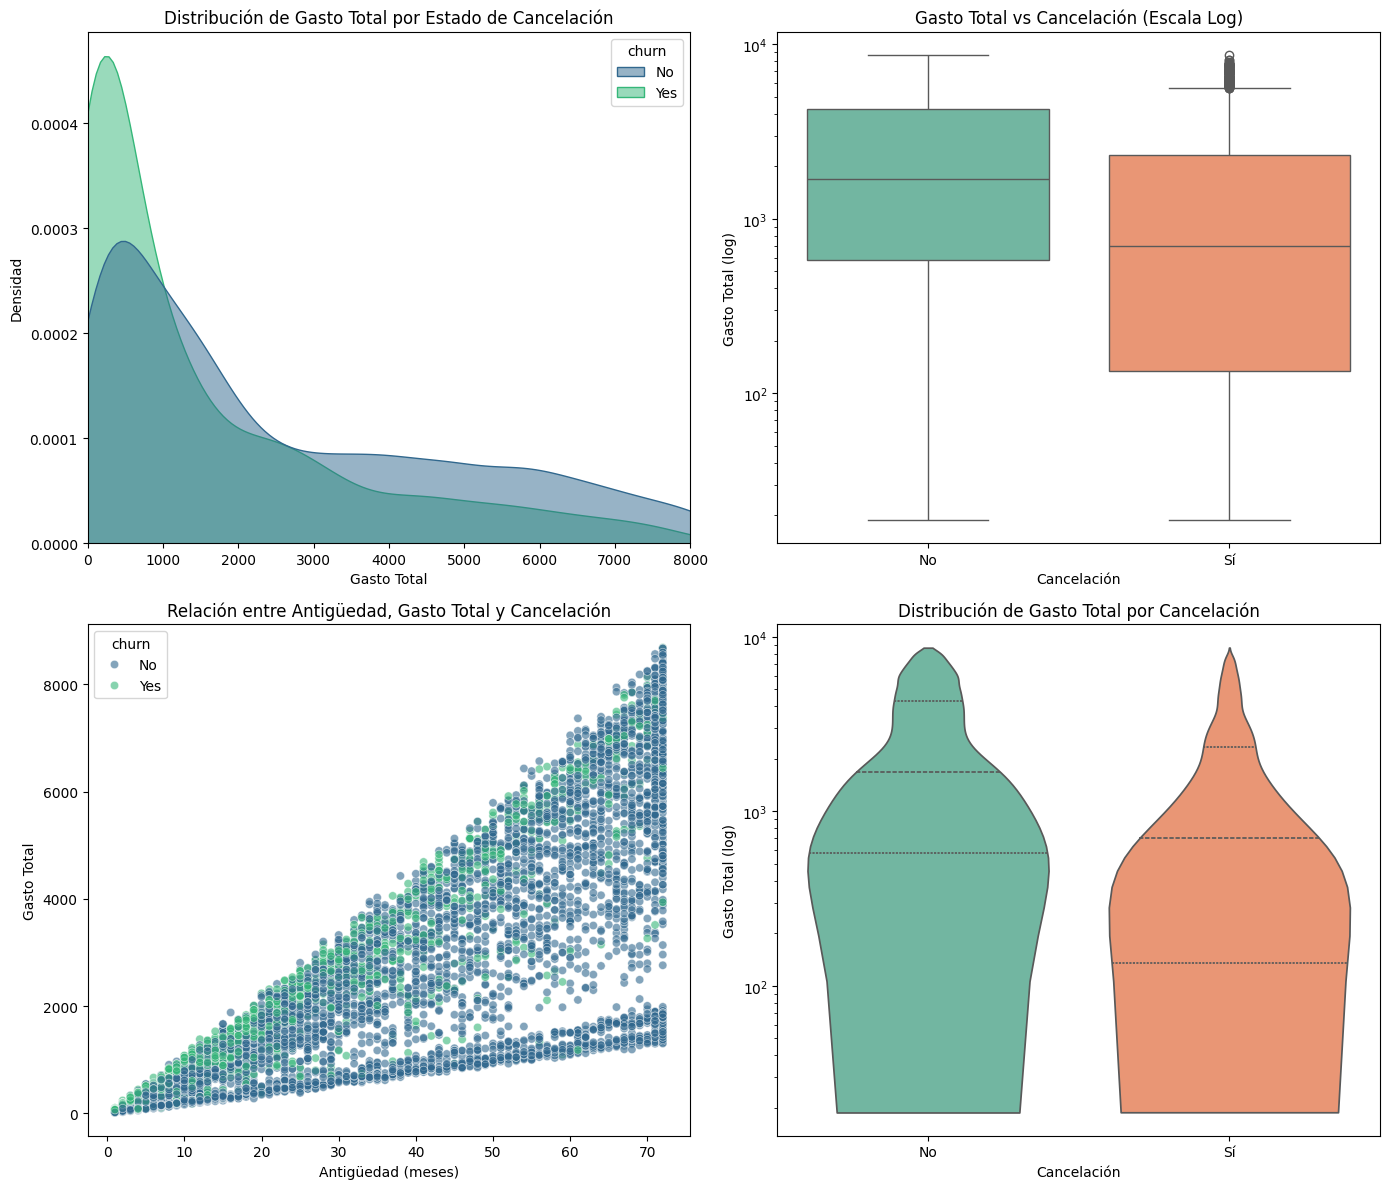

In [28]:
plt.figure(figsize=(14, 12))

# Gráfico de densidad comparativo
plt.subplot(2, 2, 1)
sns.kdeplot(data=df, x='total_charges', hue='churn', common_norm=False, fill=True, alpha=0.5, palette='viridis')
plt.title('Distribución de Gasto Total por Estado de Cancelación')
plt.xlabel('Gasto Total')
plt.ylabel('Densidad')
plt.xlim(0, 8000)

# Boxplot con transformación logarítmica
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='churn', y='total_charges', palette='Set2')
plt.yscale('log')
plt.title('Gasto Total vs Cancelación (Escala Log)')
plt.xlabel('Cancelación')
plt.ylabel('Gasto Total (log)')
plt.xticks([0, 1], ['No', 'Sí'])

# Gráfico de dispersión con tenure
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='tenure', y='total_charges', hue='churn', alpha=0.6, palette='viridis')
plt.title('Relación entre Antigüedad, Gasto Total y Cancelación')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Gasto Total')

# Gráfico de violín combinado
plt.subplot(2, 2, 4)
sns.violinplot(data=df, x='churn', y='total_charges', inner='quartile', palette='Set2', cut=0)
plt.yscale('log')
plt.title('Distribución de Gasto Total por Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Gasto Total (log)')
plt.xticks([0, 1], ['No', 'Sí'])

plt.tight_layout()
plt.show()

### Relación combinada: Antigüedad, Gasto Mensual y Cancelación

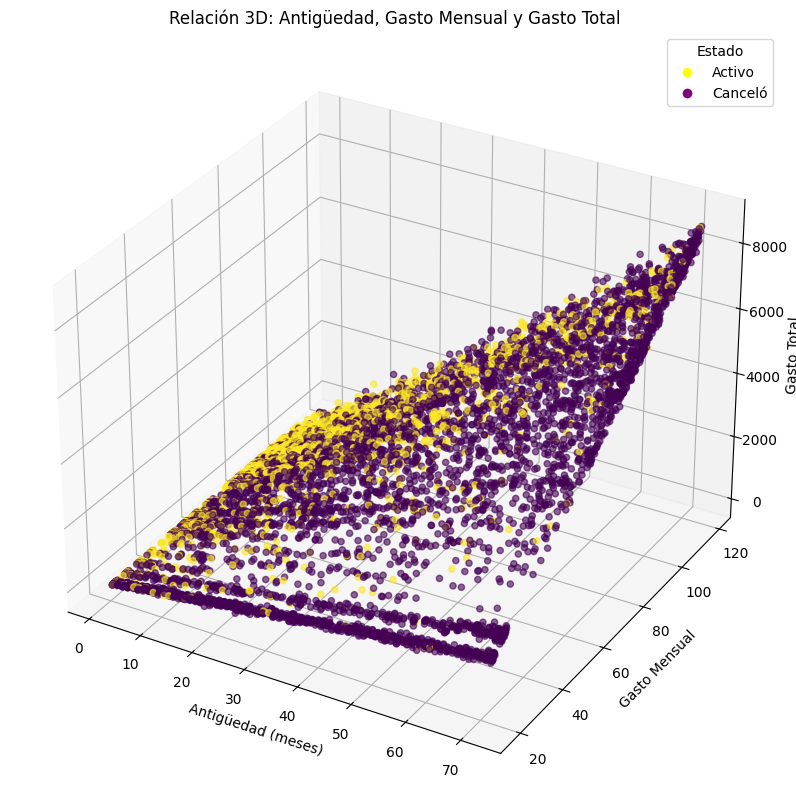

In [29]:
from mpl_toolkits.mplot3d import Axes3D

# Convertir churn a numérico para colores
df['churn_numeric'] = df['churn'].map({'No': 0, 'Yes': 1})

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Crear gráfico 3D
scatter = ax.scatter(
    df['tenure'],
    df['monthly_charges'],
    df['total_charges'],
    c=df['churn_numeric'],
    cmap='viridis',
    alpha=0.6,
    s=20
)

ax.set_xlabel('Antigüedad (meses)')
ax.set_ylabel('Gasto Mensual')
ax.set_zlabel('Gasto Total')
ax.set_title('Relación 3D: Antigüedad, Gasto Mensual y Gasto Total')

# Leyenda para churn
legend_labels = ['Activo', 'Canceló']
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=8),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=8)]
ax.legend(handles, legend_labels, title='Estado')

plt.show()

### Análisis de interacciones: Tipo de contrato y Gasto Mensual

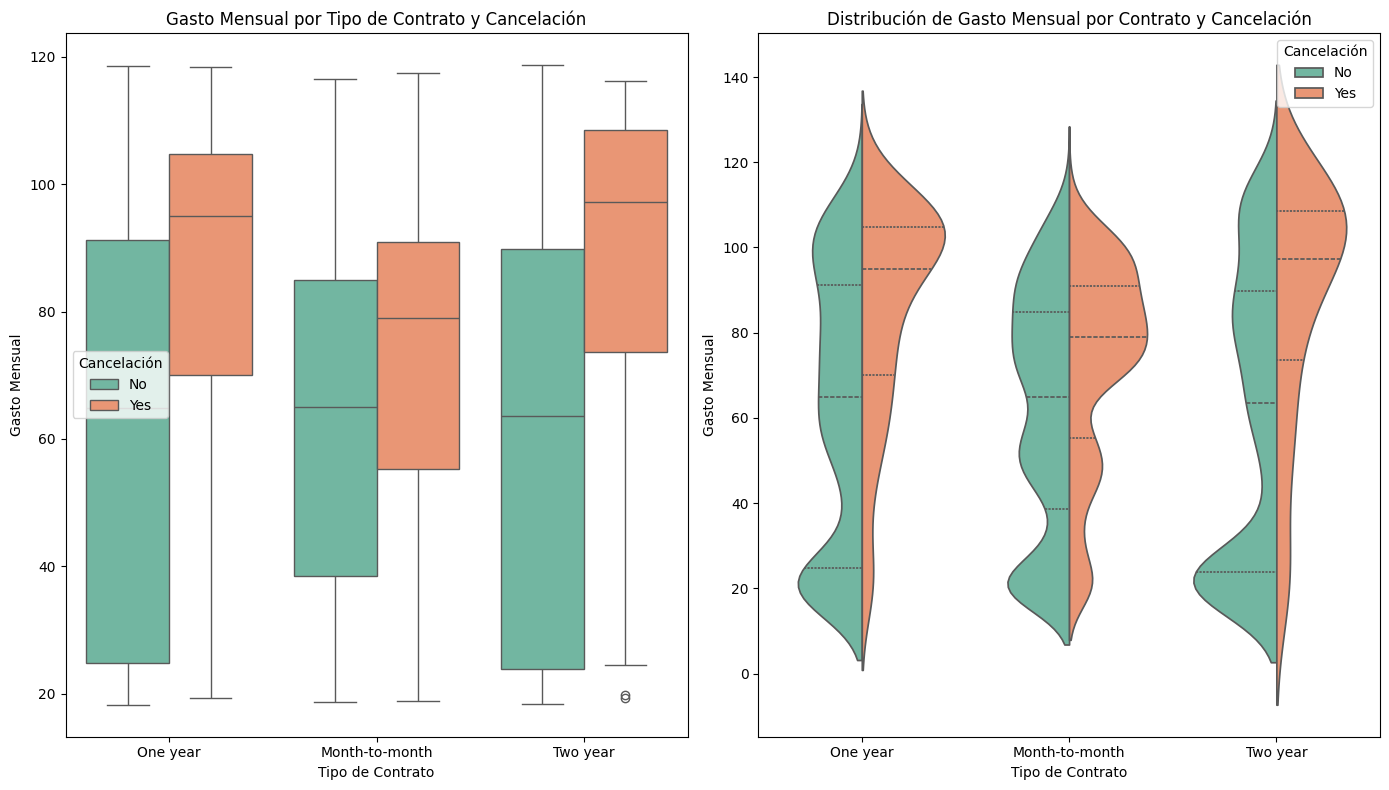

/tmp/ipython-input-30-821420576.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='tenure', y='monthly_charges', hue='contract', style='churn',


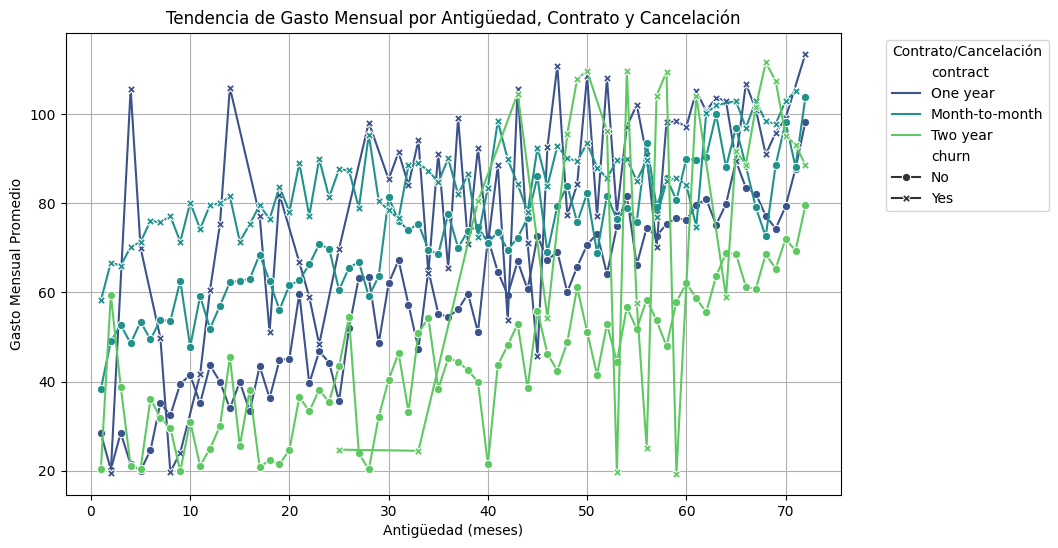

In [30]:
plt.figure(figsize=(14, 8))

# Boxplot por tipo de contrato
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='contract', y='monthly_charges', hue='churn', palette='Set2')
plt.title('Gasto Mensual por Tipo de Contrato y Cancelación')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Gasto Mensual')
plt.legend(title='Cancelación')

# Gráfico de violín con distribución
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='contract', y='monthly_charges', hue='churn',
               split=True, inner='quartile', palette='Set2')
plt.title('Distribución de Gasto Mensual por Contrato y Cancelación')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Gasto Mensual')
plt.legend(title='Cancelación', loc='upper right')

plt.tight_layout()
plt.show()

# Análisis de tendencia
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='tenure', y='monthly_charges', hue='contract', style='churn',
             ci=None, markers=True, dashes=False, palette='viridis')
plt.title('Tendencia de Gasto Mensual por Antigüedad, Contrato y Cancelación')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Gasto Mensual Promedio')
plt.legend(title='Contrato/Cancelación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Modelado Predictivo

## Separación de Datos

In [31]:
from sklearn.model_selection import train_test_split

# 1. Preparar características (X) y variable objetivo (y)
X = df_encoded.drop('churn', axis=1)  # Todas las características
y = df_encoded['churn']               # Variable objetivo

# 2. División estratificada (mantiene proporción de churn en ambos conjuntos)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # 20% para prueba
    random_state=42,      # Semilla para reproducibilidad
    stratify=y            # Estratificación por churn
)

# 3. Verificación de las proporciones
print(f"Total registros: {len(X)}")
print(f"Entrenamiento: {len(X_train)} registros ({len(X_train)/len(X):.1%})")
print(f"Prueba: {len(X_test)} registros ({len(X_test)/len(X):.1%})")
print("\nProporción de churn en entrenamiento:", y_train.value_counts(normalize=True))
print("Proporción de churn en prueba:", y_test.value_counts(normalize=True))

# 4. Guardar los conjuntos (opcional)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

Total registros: 7043
Entrenamiento: 5634 registros (80.0%)
Prueba: 1409 registros (20.0%)

Proporción de churn en entrenamiento: churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Proporción de churn en prueba: churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


## Creación de Modelos

## Implementación de la Estrategia Dual

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 1. Identificar columnas numéricas que necesitan escalado
numeric_cols = ['tenure', 'monthly_charges', 'total_charges']

# 2. Crear transformador para columnas numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'  # Mantener otras columnas sin cambios
)

# 3. Crear conjuntos de datos normalizados
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# 4. Mantener conjuntos sin normalizar
X_train_raw = X_train.copy()
X_test_raw = X_test.copy()

# 5. Verificar resultados
print("Ejemplo de datos sin normalizar (primer registro):")
print(X_train_raw.iloc[0][numeric_cols])
print("\nMismo registro normalizado:")
print(X_train_scaled[0][:len(numeric_cols)])  # Mostrar solo las primeras columnas numéricas

Ejemplo de datos sin normalizar (primer registro):
tenure                 60
monthly_charges      94.1
total_charges      5475.9
Name: 3902, dtype: object

Mismo registro normalizado:
[1.1248909727846765 0.9682496061114396 1.398543001285912]


### Modelos basados en distancia (KNN):

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Sin normalización
knn_raw = KNeighborsClassifier()
knn_raw.fit(X_train_raw, y_train)

# Con normalización
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)

print("\nKNN - Precisión sin normalización:", knn_raw.score(X_test_raw, y_test))
print("KNN - Precisión con normalización:", knn_scaled.score(X_test_scaled, y_test))


KNN - Precisión sin normalización: 0.7693399574166075
KNN - Precisión con normalización: 0.7672107877927609


### Modelos basados en optimización (Regresión Logística):

In [40]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression(max_iter=1000)  # aumentar de 100 a 1000
modelo_log.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [41]:
from sklearn.linear_model import LogisticRegression

# Sin normalización
lr_raw = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_raw.fit(X_train_raw, y_train)

# Con normalización
lr_scaled = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_scaled.fit(X_train_scaled, y_train)

print("\nRegresión Logística - Precisión sin normalización:", lr_raw.score(X_test_raw, y_test))
print("Regresión Logística - Precisión con normalización:", lr_scaled.score(X_test_scaled, y_test))


Regresión Logística - Precisión sin normalización: 0.7381121362668559
Regresión Logística - Precisión con normalización: 0.7395315826827538


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Algoritmos basados en árboles:

In [38]:
# Asumiendo que 'y_train' es la variable objetivo (churn)
# y que '1' representa los clientes que cancelaron
ratio_desbalance = y_train.value_counts()[0] / y_train.value_counts()[1]


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Árbol de decisión
tree = DecisionTreeClassifier(class_weight='balanced')
tree.fit(X_train_raw, y_train)
print("\nÁrbol de Decisión - Precisión:", tree.score(X_test_raw, y_test))

# Random Forest
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_raw, y_train)
print("Random Forest - Precisión:", rf.score(X_test_raw, y_test))

# XGBoost
xgb = XGBClassifier(scale_pos_weight=ratio_desbalance, eval_metric='logloss')
xgb.fit(X_train_raw, y_train)
print("XGBoost - Precisión:", xgb.score(X_test_raw, y_test))


Árbol de Decisión - Precisión: 0.7359829666430092
Random Forest - Precisión: 0.7877927608232789
XGBoost - Precisión: 0.751596877217885


## Evaluación de los Modelos